In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.read_icrfn import read_icrf3

Read the ICRF3 S/X catalog.

In [2]:
# Read ICRF3 S/X catalog
icrf3_sx = read_icrf3(wv="sx")

Have a glance of the catalog.

In [3]:
icrf3_sx

<Table masked=True length=4536>
   icrf_name     iers_name type          ra         ... end_obs nb_sess nb_del
                                        deg         ...                       
     str16          str8   str1       float64       ... float64  int64  int64 
---------------- --------- ---- ------------------- ... ------- ------- ------
J000020.3-322101  2357-326   --       0.08499990025 ... 57776.0       4    237
J000027.0+030715  2357+028   -- 0.11259380737499998 ... 57974.7       1     28
J000053.0+405401  2358+406   -- 0.22117109666666665 ... 57809.9       3    152
J000105.3-155107  2358-161   -- 0.27220306162499996 ... 58137.6       4    316
J000107.0+605122  2358+605   --  0.2795825644583333 ... 57836.8       3    172
J000108.6+191433  2358+189   --  0.2859231923333333 ... 58205.8     168   3584
J000211.9-215309  2359-221   --  0.5499226089166666 ... 57901.9       3    103
J000315.9-194150  0000-199   --  0.8164558497083333 ... 58137.6       4    251
J000318.6-192722  0000-197   --  0.8278126181249998 ... 58137.6       5    296
             ...       ...  ...                 ... ...     ...     ...    ...
J235753.2-531113  2355-534    D  359.47194187566663 ... 58101.7     165   4895
J235809.8+492143  2355+490   --   359.5408896171249 ... 57840.3       2    174
J235810.8-102008  2355-106    D   359.5453433192499 ... 58204.3     768  24542
J235816.9-285334  2355-291   --   359.5707148113749 ... 57771.0       3    137
J235828.8+043024  2355+042   --  359.62019570283326 ... 57840.3       4    260
J235846.0+195520  2356+196   --   359.6920212854583 ... 57875.7       5    388
J235859.8+392228  2356+390   --   359.7493965439166 ... 57809.9       3    230
J235931.8-063943  2356-069   --     359.88256707925 ... 58048.6       5    195
J235933.1+385042  2356+385    D   359.8882533119583 ... 58204.3    1272  26649
J235935.4-313343  2357-318   --    359.897881414125 ... 58204.3     235   4692

Seperate the sources into the "defining sources" and "other sources", and also "south" and "north".

In [4]:
# Defining sources
mask_def = (icrf3_sx["type"] == "D")
icrf3_sx_def = icrf3_sx[mask_def]

# Other sources
mask_oth = (icrf3_sx["type"] != "D")
icrf3_sx_oth = icrf3_sx[mask_oth]

# Southern sources
mask_sou = (icrf3_sx["dec"] < 0)
icrf3_sx_sou = icrf3_sx[mask_sou]

# Northern sources
mask_nor = (icrf3_sx["dec"] >= 0)
icrf3_sx_nor = icrf3_sx[mask_nor]

In [5]:
print("There are {} defining sources and {} other sources, "
      "{} sources in the northern hemisphere and {} in the south.".format(
      len(icrf3_sx_def), len(icrf3_sx_oth), len(icrf3_sx_nor), len(icrf3_sx_sou)))

There are 303 defining sources and 4233 other sources, 2615 sources in the northern hemisphere and 1921 in the south.


Then I plotted the sky distribution of all these sources.

/Users/Neo/softwares/anaconda3/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


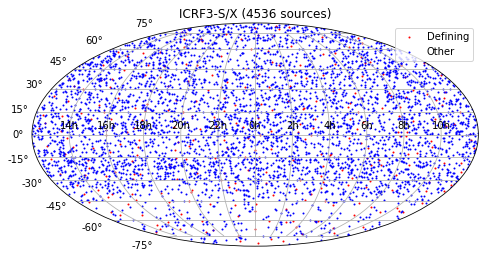

In [6]:
ra_def = coord.Angle(icrf3_sx_def["ra"]).wrap_at(180*u.degree)
dec_def = coord.Angle(icrf3_sx_def["dec"])

ra_oth = coord.Angle(icrf3_sx_oth["ra"]).wrap_at(180*u.degree)
dec_oth = coord.Angle(icrf3_sx_oth["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_def.radian, dec_def.radian, c="r", s=1, label="Defining")
ax.scatter(ra_oth.radian, dec_oth.radian, c="b", s=1, label="Other")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
ax.set_title("ICRF3-S/X (4536 sources)")
ax.grid(True)
ax.legend(loc="upper right")

plt.savefig("../plots/icrf3_sx_source_distribution.eps")

Also the sky ditribution of the formal in right ascension, declination, and the correlation.

In [7]:
# The distribution of formal errors.
ra_all = coord.Angle(icrf3_sx["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_sx["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_sx["ra_err"], 
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\\alpha^*}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-S/X")

plt.savefig("../plots/icrf3_sx_ra_error.eps")

In [8]:
# The distribution of formal errors.
ra_all = coord.Angle(icrf3_sx["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_sx["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_sx["dec_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\delta}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-S/X")

plt.savefig("../plots/icrf3_sx_dec_error.eps")

In [9]:
# The distribution of formal errors.
ra_all = coord.Angle(icrf3_sx["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_sx["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_sx["pos_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{pos,max}$ [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-S/X")

plt.savefig("../plots/icrf3_sx_pos_error.eps")

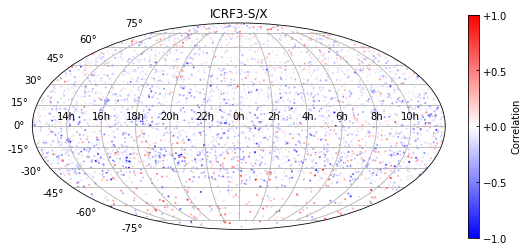

In [10]:
# The distribution of correlation between R.A. and Decl..
ra_all = coord.Angle(icrf3_sx["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_sx["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_sx["ra_dec_corr"],
                s=1, vmin=-1, vmax=1, cmap="bwr")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, ticks=np.arange(-1., 1.1, 0.5), format="$%+.1f$",
             label="Correlation", fraction=0.025)
ax.grid(True)
ax.set_title("ICRF3-S/X")

plt.savefig("../plots/icrf3_sx_ra_dec_corr.eps")

Then I check the formal errors of the source positions.

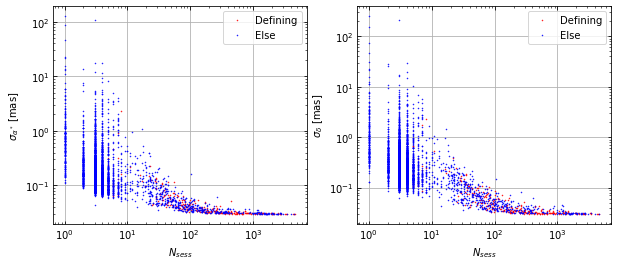

In [11]:
# Formal errors vs. number of observing sessions.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_sx_def["nb_sess"],
         icrf3_sx_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_sx_oth["nb_sess"],
         icrf3_sx_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{sess}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_sx_def["nb_sess"],
         icrf3_sx_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_sx_oth["nb_sess"],
         icrf3_sx_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{sess}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_sx_error_numsess.eps")

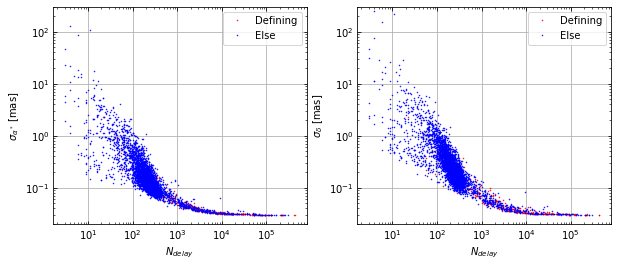

In [12]:
# Formal errors vs. number of observing delays.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_sx_def["nb_del"],
         icrf3_sx_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_sx_oth["nb_del"],
         icrf3_sx_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_sx_def["nb_del"],
         icrf3_sx_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_sx_oth["nb_del"],
         icrf3_sx_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_sx_error_numdelay.eps")

In [13]:
# Formal errors vs. number of observing delays.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_sx_nor["nb_del"],
         icrf3_sx_nor["ra_err"], "r.", ms=1, label="North")
ax0.plot(icrf3_sx_sou["nb_del"],
         icrf3_sx_sou["ra_err"], "b.", ms=1, label="South")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_sx_nor["nb_del"],
         icrf3_sx_nor["dec_err"], "r.", ms=1, label="North")
ax1.plot(icrf3_sx_sou["nb_del"],
         icrf3_sx_sou["dec_err"], "b.", ms=1, label="South")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_sx_error_numdelay-south-north.eps")

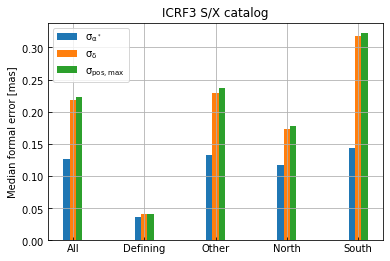

In [14]:
# Plot the median formal error

# Median formal error
med_ra = [
    np.median(icrf3_sx["ra_err"].filled()),
    np.median(icrf3_sx_def["ra_err"].filled()),
    np.median(icrf3_sx_oth["ra_err"].filled()),
    np.median(icrf3_sx_nor["ra_err"].filled()),
    np.median(icrf3_sx_sou["ra_err"].filled())
]

med_dec = [
    np.median(icrf3_sx["dec_err"].filled()),
    np.median(icrf3_sx_def["dec_err"].filled()),
    np.median(icrf3_sx_oth["dec_err"].filled()),
    np.median(icrf3_sx_nor["dec_err"].filled()),
    np.median(icrf3_sx_sou["dec_err"].filled())
]

med_pos = [
    np.median(icrf3_sx["pos_err"].filled()),
    np.median(icrf3_sx_def["pos_err"].filled()),
    np.median(icrf3_sx_oth["pos_err"].filled()),
    np.median(icrf3_sx_nor["pos_err"].filled()),
    np.median(icrf3_sx_sou["pos_err"].filled())
]

names = ["All", "Defining", "Other", "North", "South"]

pos = np.arange(len(names)) + 1
width = 0.8 / (2 * len(names) - 1)

fig, ax = plt.subplots()
ax.bar(pos - width, med_ra, width=width, label="$\mathrm{\sigma_{\\alpha^*}}$")
ax.bar(pos, med_dec, width=width, label="$\mathrm{\sigma_{\\delta}}$")
ax.bar(pos + width, med_pos, width=width, label="$\mathrm{\sigma_{pos,max}}$")

ax.set_xticks(pos)
ax.set_xticklabels(names)

ax.set_ylabel("Median formal error [mas]")

ax.set_title("ICRF3 S/X catalog")

ax.legend()
ax.grid()

plt.savefig("../plots/icrf3_sx_median_error.eps")

In [15]:
# Median formal error
print("Median formal error in ICRF3 S/X catalog [mas]:  \n"
      "-----------------------------------------------\n"
      "           R.A. cos(decl.)    Decl.     EEMA   \n"
      "All        %6.3f             %6.3f    %6.3f    \n"
      "Defining   %6.3f             %6.3f    %6.3f    \n"
      "Other      %6.3f             %6.3f    %6.3f    \n" 
      "North      %6.3f             %6.3f    %6.3f    \n"
      "South      %6.3f             %6.3f    %6.3f    \n"% 
    (med_ra[0], med_dec[0], med_pos[0],
     med_ra[1], med_dec[1], med_pos[1],
     med_ra[2], med_dec[2], med_pos[2],
     med_ra[3], med_dec[3], med_pos[3],
     med_ra[4], med_dec[4], med_pos[4]
    ))

Median formal error in ICRF3 S/X catalog [mas]:  
-----------------------------------------------
           R.A. cos(decl.)    Decl.     EEMA   
All         0.127              0.218     0.223    
Defining    0.036              0.041     0.041    
Other       0.132              0.229     0.236    
North       0.117              0.173     0.178    
South       0.143              0.318     0.322    



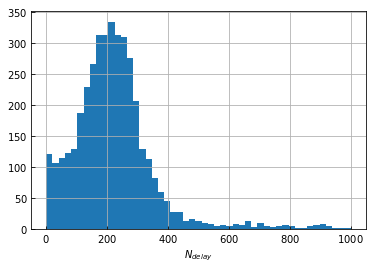

In [22]:
bins = np.linspace(0, 1000, 50)

fig, ax = plt.subplots()

ax.hist(icrf3_sx["nb_del"], bins)
ax.set_xlabel("$N_{delay}$")
ax.grid()

plt.savefig("../plots/icrf3_sx_nobs_hist.eps")